In [2]:
from utils import configure_environment
configure_environment()


Seed set to 86642


Device set to cuda


In [3]:
import torch
import keras
from keras.layers import Embedding, LSTM, Dense, Flatten, Attention, Bidirectional, Add
from models import BinaryAttentionClassifier, BinaryConvolutionalClassifier, BinaryLSTMClassifier
from generators import SubsequenceDiscriminationData
import numpy as np
import random

In [4]:
from callbacks import LogBinaryDiscoveryData

subsequence = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
length = 24
characters=2
model = BinaryAttentionClassifier(24, model_scale=1)
model.fit(SubsequenceDiscriminationData(characters=2, length=length, batch_size=128), epochs=5000, callbacks=[LogBinaryDiscoveryData(model, topk=len(subsequence), frequency=100)])

I0000 00:00:1734110577.375685   18265 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734110577.379419   18265 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734110577.381459   18265 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734110577.385410   18265 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

AttributeError: 'BinaryAttentionClassifier' object has no attribute 'parameters'

In [31]:
generator = SubsequenceDiscriminationData(characters=characters, length=sequence_length, batch_size=128)
model = BinaryAttentionClassifier(input_length=sequence_length, tokens=characters)
model.fit(generator, epochs=1, callbacks=[])

AttributeError: 'BinaryAttentionClassifier' object has no attribute 'parameters'

In [ ]:
from keras.metrics import binary_accuracy


def experiment(model, characters, sequence_length, epochs):
	generator = SubsequenceDiscriminationData(characters=characters, length=sequence_length, batch_size=128)
	model = model(input_length=sequence_length, tokens=characters)
	model.fit(generator, epochs=epochs, callbacks=[])
	x, targets = generator()[0]
	outputs = model(x)
	return binary_accuracy(targets, outputs).mean().item()

In [29]:
experiment(BinaryAttentionClassifier, characters=2, sequence_length=20, epochs=1)

AttributeError: 'BinaryAttentionClassifier' object has no attribute 'parameters'

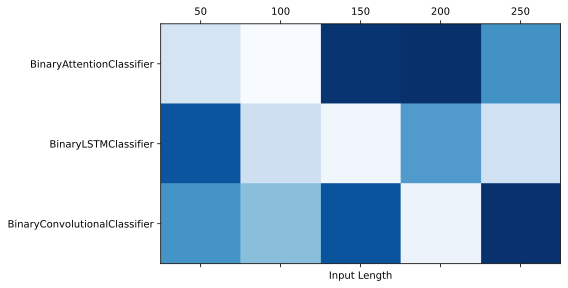

In [ ]:
# Create a grid with models on the y-axis and input lengths on the x-axis
data = np.random.random((len(input_lengths), len(models)))
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the grid with models on y-axis and input lengths on x-axis
cax = ax.matshow(data.T, cmap='Blues')  # Transpose the data for correct orientation

# Set the x and y axis labels
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(np.arange(len(input_lengths)))
ax.set_xticklabels(input_lengths)

# Title and labels
ax.set_xlabel("Character")

plt.tight_layout()
plt.show()
